In [1]:
from langchain.chat_models import ChatCohere
from langchain.vectorstores import Chroma
from langchain.embeddings import CohereEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from dotenv import load_dotenv
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import re
import os
load_dotenv()
COHERE_API_KEY = os.getenv('COHERE_API_KEY')

In [2]:
embeddings = CohereEmbeddings(cohere_api_key=COHERE_API_KEY)
db_text = Chroma(persist_directory="../chroma_db", embedding_function=embeddings)

In [3]:
chat = ChatCohere()

In [4]:
retriever = db_text.as_retriever()

In [5]:
template = """Fetch hotel names, hotel rating, address, attractions(if any), description, hotel facilities, 
map, phone number, pincode, website url below details based only on the following context,
if you don't know the answer just say I don't know, don't try to make up:
{context}
Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [6]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | chat
    | StrOutputParser()
)

In [7]:
query = "Suggest me hotels in Zanzibar City, Tanzania"
print(chain.invoke(query))

Sure! Here are the details of three hotels in Zanzibar City, Tanzania based on the information you provided:

1. 27 Cafe Zanzibar Airport Hotel:
   - Three-star hotel located 3.4 km from the food market.
   - Offers an on-site lively cafe, restaurant, and bar open 24/7.
   - Provides airport shuttle service, Wi-Fi, and parking.
   - Nearest airport is Abeid Amani Karume International Airport, 1 km away.
   - Address: Airport Road Kiembe Samaki-Mkunazi Wa Pili, PO Box 658, Zanzibar.

2. Chuini Zanzibar Beach Lodge:
   - Four-star hotel located 12 km north of Stone Town.
   - Features a private beach and the remains of the historic Chuini Palace.
   - Offers spacious bungalows with private terraces and ocean views.
   - Guests can enjoy international cuisine at the on-site restaurant and bar.
   - Provides spa treatments, outdoor pools, and free Wi-Fi.
   - Located 8 km from Masingini Forest and 25 minutes from Zanzibar International Airport.
   - Address: Chuini Palace Ruins, Bububu, PO

In [8]:
db_image = Chroma(persist_directory="../chroma_db_image", embedding_function=embeddings)
docs = db_image.similarity_search(query)
res = docs[0].page_content

In [9]:
print(res)

countyCode: TZ
countyName: Tanzania
cityCode: 143346
cityName: Zanzibar City
HotelCode: 1580915
HotelName: 27 Cafe Zanzibar Airport Hotel
HotelRating: ThreeStar
Address: Airport Road Kiembe Samaki-Mkunazi Wa PiliPO Box 658Zanzibar
Attractions: 
Description: Situated in Zanzibar City, 3.4 km from Food market, Coastal Zanzibar Airport Hotel, formerly MP Airport Hotel, features air-conditioned rooms. Guests can enjoy an on-site lively café and the on-site restaurant. Our bar and restaurant are open 24hr a day 7 days on 7

Coastal Zanzibar Airport Hotel features free Wi-Fi throughout the property. A flat-screen TV is available.

There is a 24-hour front desk at the property.

A Travel Information Office at the hotel can arrange safaris within Tanzania and domestic and international flights.

The hotel also offers car hire.  The nearest airport is Abeid Amani Karume International Airport, 1 km from Coastal Zanzibar Airport Hotel. Please inform 27 Cafe Zanzibar Airport Hotel in advance of yo

In [10]:
# Extract hotel name
hotel_name_match = re.search(r'HotelName: ([^\n]+)', res)
hotel_name = hotel_name_match.group(1) if hotel_name_match else None

# Print the extracted information
print("Hotel Name:", hotel_name)

Hotel Name: 27 Cafe Zanzibar Airport Hotel


In [11]:
# Regular expression to find image URLs
image_pattern = re.compile(r'https://api\.tbotechnology\.in/imageresource\.aspx\?img=[^,]+')

# Find all matches of the pattern in the text
image_urls = image_pattern.findall(docs[0].page_content)

# Print the image URLs
for i, url in enumerate(image_urls, start=1):
    print(f"Image {i}: {url}")

Image 1: https://api.tbotechnology.in/imageresource.aspx?img=FbrGPTrju5e/HYusSxssYNGz+r+daGo8+nI8f2/HFw9QwX+47gOd8n0vhhPU+r1vnpFkMWburG8jTIldr7VhdulnqaQsTIUPAEif/jDVBriBqHuw4Yy/XKrlsOnZkEgrb9KIYpJSDBh6cjC8ku1uhSqYvRUxY2Wz4ngqvncGdYAE8F/luW2soQ==
Image 2: https://api.tbotechnology.in/imageresource.aspx?img=FbrGPTrju5e/HYusSxssYNGz+r+daGo8+nI8f2/HFw9QwX+47gOd8n0vhhPU+r1v0jEj0L8v5zggbYPujSZmhyfjzGneUtAR/JR7NhfRcKYUL1hIIjGXDrUz6EqqYP8B/QW30W1OBe6XsGMn0YZnUGDZIYIFi+Sk2oo6BN7zM0eLj0ExYkKo2g==
Image 3: https://api.tbotechnology.in/imageresource.aspx?img=FbrGPTrju5e/HYusSxssYNGz+r+daGo8+nI8f2/HFw9QwX+47gOd8n0vhhPU+r1v0jEj0L8v5zh4eucOxxc1cW/rFi9V7jlg6dFsT1ngwQqDRhKGAeJM8KmfSz2V+JOY6RTFHFLSpwdTV5yYlOkhe4xubccEi1OMLledY8bXGLWXV81u42eVzg==
Image 4: https://api.tbotechnology.in/imageresource.aspx?img=FbrGPTrju5e/HYusSxssYNGz+r+daGo8+nI8f2/HFw9QwX+47gOd8n0vhhPU+r1vG0pjP9VIDuHCu4XAee6WMNWfZpj6UCXaY6qXEi9I+KVzaeRP4Z/mpo3h1Y4PDIyZWKfentkE7zOXTLkOqulbbCcU1OCPxf8/5Z6Hq0ta9vKfoGTeriQ+8Q==
Image 5: https:/

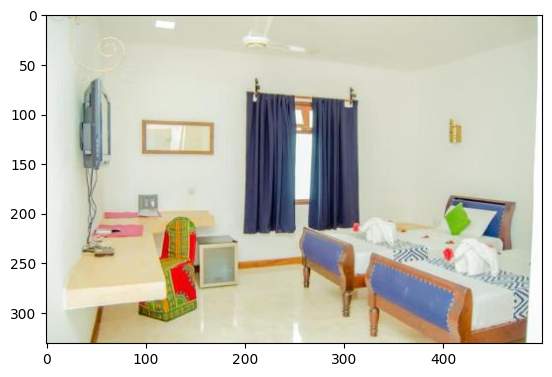

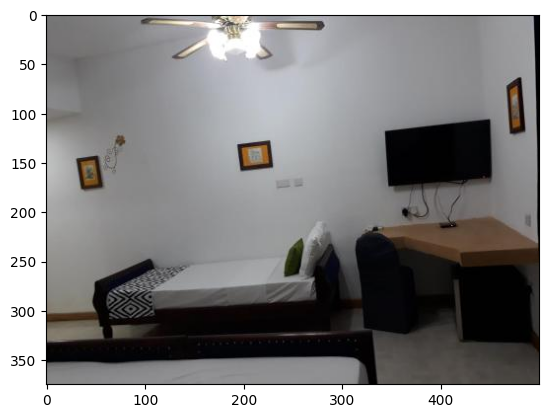

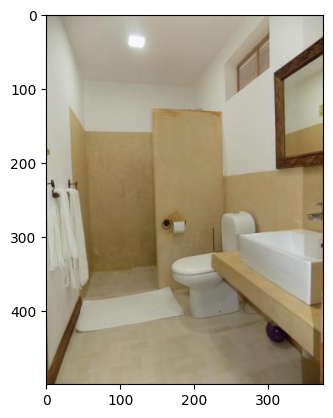

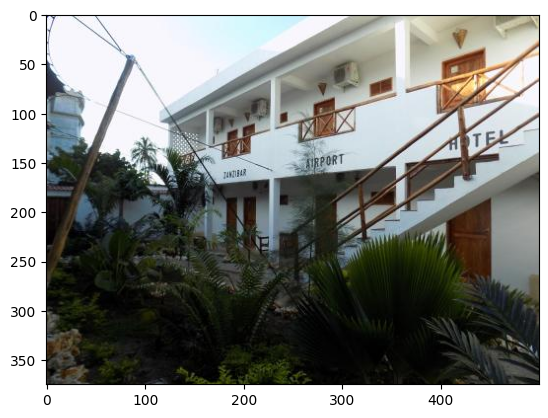

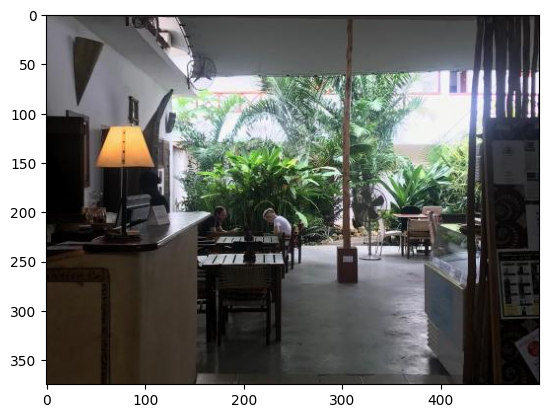

In [12]:
# display the images
for i, url in enumerate(image_urls[:5], start=1):
    response = requests.get(url)
    
    if response.status_code == 200:
        # Open the image using PIL
        img = Image.open(BytesIO(response.content))
        
        # Display the image
        plt.imshow(img)
        plt.show()
        
    else:
        print(f"Failed to fetch image {i} from {url}. Status code: {response.status_code}")